# Project 5: Tweet Data for WeRateDogs

In [1]:
# Import packages

import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import pandas as pd
import numpy as np
import requests
import json
import re
import statistics as stat
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# Wrangling

## Gather

In [2]:
# Read in twitter-archive-enhanced.csv as df

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Download image-predictions.tsv using requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)
open('image-predictions.tsv', 'wb').write(r.content);

# Read in image-predictions.tsv as df

image_predictions = pd.read_csv('image-predictions.tsv', delimiter='\t')

In [4]:
# Read json into df (read in all data, edit later)

tweet_data = pd.read_json('tweet_json.txt', lines = True,encoding='utf-8')

# Write to CSV to save

tweet_data.to_csv('tweet_data.csv', encoding='utf-8', index=False)

## Assess

In [5]:
# Display all columns and increase width to show more of contents

pd.set_option('display.max_columns', 32)
pd.set_option('display.max_colwidth', 500)

In [6]:
# Preview df

tweet_data.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150...","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'r...",37891,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,892420643555336193,892420643555336192,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,8275,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'location': '「 DM YOUR DOGS 」', 'description': 'Your Only Source For Professional Dog Ratings ⠀ ⠀IG, FB, Snapchat ➪ WeRateDogs partnerships@weratedogs.com', 'url': 'https://t.co/N7sNNHSfPq', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHSfPq', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False,..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 15...","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1055, 'h': 1200,...",32550,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,892177421306343426,892177421306343424,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,6113,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'location': '「 DM YOUR DOGS 」', 'description': 'Your Only Source For Professional Dog Ratings ⠀ ⠀IG, FB, Snapchat ➪ WeRateDogs par

In [7]:
# View df info, look at columns, data types, number entries, nulls

tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2339
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2340 non-null datetime64[ns]
display_text_range               2340 non-null object
entities                         2340 non-null object
extended_entities                2067 non-null object
favorite_count                   2340 non-null int64
favorited                        2340 non-null bool
full_text                        2340 non-null object
geo                              0 non-null float64
id                               2340 non-null int64
id_str                           2340 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [8]:
# Preview df

twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [9]:
# View df info, look at columns, data types, number entries, nulls

twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
# See maxes, mins, averages...

twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
# View rating denominator values and occurences

twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [12]:
# Look at rows with rating denominator other than 10

twitter_archive.loc[twitter_archive['rating_denominator']!=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184

In [13]:
# View dog name counts (looking for non names)

twitter_archive.name.value_counts().sort_index()

Abby             2
Ace              1
Acro             1
Adele            1
Aiden            1
Aja              1
Akumi            1
Al               1
Albert           2
Albus            2
Aldrick          1
Alejandro        1
Alexander        1
Alexanderson     1
Alf              1
Alfie            5
Alfy             1
Alice            2
Amber            1
Ambrose          1
Amy              1
Amélie           1
Anakin           2
Andru            1
Andy             1
Angel            1
Anna             1
Anthony          1
Antony           1
Apollo           1
                ..
Ziva             1
Zoe              1
Zoey             3
Zooey            1
Zuzu             1
a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old         

In [14]:
# Check for occurences of multiple classifications

print(len(twitter_archive[(twitter_archive.doggo != 'None') & (twitter_archive.floofer != 'None')]))
print(len(twitter_archive[(twitter_archive.doggo != 'None') & (twitter_archive.pupper != 'None')]))
print(len(twitter_archive[(twitter_archive.doggo != 'None') & (twitter_archive.puppo != 'None')]))
print(len(twitter_archive[(twitter_archive.floofer != 'None') & (twitter_archive.pupper != 'None')]))
print(len(twitter_archive[(twitter_archive.floofer != 'None') & (twitter_archive.puppo != 'None')]))
print(len(twitter_archive[(twitter_archive.pupper != 'None') & (twitter_archive.puppo != 'None')]))

1
12
1
0
0
0


In [15]:
# Preview df

image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
# View df info, look at columns, data types, number entries, nulls

image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality Issues

#### tweet_data
- tweet_data contains many unnecessary columns
- Many columns in tweet_data contain NaNs (some contain only NaNs)
- Contains retweets
- contains replies
- tweet_data id is int not string

#### twitter_archive
- Entries in dog stage classification categories include many 'none' entries
- Some dogs have multiple stage classifications (doggo/floofer, doggo/pupper, doggo/puppo)
- Some ratings have strange denominator values (less than 10 or much greater than 10)
- Ratings extraction not always correct (uses first instance of x/y)
    - Example: tweet_id 682962037429899265 extracted rating is incorrect (711)
- Ratings extraction does not catch decimal ratings (x.xx/y)
- Contains retweets
- Contains replies
- tweet_id is int not string
- timestamp is string not datetime
- Not all names extracted, some names extracted wrong (non-name words, often lowercase)
    - Example: tweet_id 717537687239008257 extracted name incorrect (a)

#### image_predictions
- Only 2075 rows in image_predictions (less than other dfs, suggests tweets with no images in other dfs)
- Some predictions are not dogs

### Tidiness Issues

- Data in 3 tables, need master table
- Dog stage classification in 4 columns

## Clean

In [17]:
# Make copies of all dfs

twitter_archive2 = twitter_archive.copy()
tweet_data2 = tweet_data.copy()
image_predictions2 = image_predictions.copy()

### Quality

- Drop all columns from tweet_data except: 'favorite_count', 'id', 'retweet_count'

In [18]:
# Drop unwanted columns from tweet_data2

tweet_data2 = tweet_data2[['id', 'favorite_count', 'retweet_count']]

In [19]:
# Test

tweet_data2.head()

,id,favorite_count,retweet_count
0,892420643555336193,37891,8275
1,892177421306343426,32550,6113
2,891815181378084864,24510,4050
3,891689557279858688,41240,8419
4,891327558926688256,39410,9118


### Quality

- Convert tweet_data2 columns to proper data types (favorite and retweet ok, change id to string)
- Change id name to tweet_id to match other dfs

In [20]:
# Convert id column to strings

tweet_data2.id = tweet_data2.id.astype(str)

# Change name of id column

tweet_data2.rename(columns={'id':'tweet_id'}, inplace=True)

In [21]:
# Test

tweet_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null object
favorite_count    2340 non-null int64
retweet_count     2340 non-null int64
dtypes: int64(2), object(1)
memory usage: 73.1+ KB


### Quality

- Convert 'None' entries in doggo, floofer, puppo, and pupper columns of twitter_archive to NaNs

In [22]:
# Convert all 'None' to NaN

twitter_archive2.replace('None', np.nan, inplace=True)

In [23]:
# Test

twitter_archive2.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,NaN,NaN,NaN


### Tidiness

- Combine stage classifications into 1 column called 'stage'

In [24]:
# Combine into new 'stage' column

twitter_archive2['stage'] = twitter_archive2[twitter_archive2.columns[13:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),axis=1)

In [25]:
# Drop stages columns

twitter_archive2 = twitter_archive2.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [26]:
twitter_archive2.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
395,825535076884762624,NaN,NaN,2017-01-29 02:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a very loving and accepting puppo. Appears to have read her Constitution well. 14/10 would pat head approvingly https://t.co/6ao80wIpV1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825535076884762624/photo/1,14,10,NaN,puppo
348,831670449226514432,NaN,NaN,2017-02-15 01:04:21 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Daisy. She has a heart on her butt. 13/10 topical af https://t.co/u6p4LxzHKg,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831670449226514432/photo/1,13,10,Daisy,
543,805958939288408065,NaN,NaN,2016-12-06 02:15:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Penny. She fought a bee and the bee won. 10/10 you're fine Penny, everything's fine https://t.co/zrMVdfFej6",7.827226e+17,4.196984e+09,2016-10-02 23:23:04 +0000,"https://twitter.com/dog_rates/status/782722598790725632/photo/1,https://twitter.com/dog_rates/status/782722598790725632/photo/1",10,10,Penny,
2190,668960084974809088,NaN,NaN,2015-11-24 01:11:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jaycob. He got scared of the vacuum. Hide &amp; seek champ. Almost better than Kony. Solid shampoo selection. 10/10 https://t.co/952hUV6RiK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668960084974809088/photo/1,10,10,Jaycob,
72,878604707211726852,NaN,NaN,2017-06-24 13:24:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Martha is stunning how h*ckin dare you. 13/10 https://t.co/9uABQXgjwa,NaN,NaN,NaN,https://twitter.com/bbcworld/status/878599868507402241,13,10,NaN,


### Quality

- Replace instances of mulitple classification (doggopupper) in stage column with 'multiple'

In [27]:
# Check issues

twitter_archive2.stage.value_counts()

                 1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

In [28]:
# Replace with 'multiple'

twitter_archive2.stage = twitter_archive2.stage.str.replace('doggo,pupper', 'multiple')
twitter_archive2.stage = twitter_archive2.stage.str.replace('doggo,puppo', 'multiple')
twitter_archive2.stage = twitter_archive2.stage.str.replace('doggo,floofer', 'multiple')

In [29]:
# Test

twitter_archive2.stage.value_counts()

            1976
pupper       245
doggo         83
puppo         29
multiple      14
floofer        9
Name: stage, dtype: int64

### Quality

- Fix twitter_archive2 data type issues (change tweet_id to string, change stage to categorical, change timestamp to datetime)

In [30]:
# Convert to propper data types

twitter_archive2.tweet_id = twitter_archive2.tweet_id.astype(str)
twitter_archive2.timestamp = pd.to_datetime(twitter_archive2['timestamp'])
twitter_archive2.stage = twitter_archive2.stage.astype('category')

In [31]:
# Test

twitter_archive2.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,


In [32]:
# Test

twitter_archive2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
stage                         2356 non-null category
dtypes: category(1), datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 241.9+ KB


### Quality

- Remove retweets from twitter_archive2

In [33]:
# Make replace NaNs with 0s

twitter_archive2.retweeted_status_id = twitter_archive2.retweeted_status_id.fillna(0)

# Drop retweets

twitter_archive2 = twitter_archive2[twitter_archive2.retweeted_status_id == 0]

In [34]:
# Test

twitter_archive2.retweeted_status_id.value_counts()

0.0    2175
Name: retweeted_status_id, dtype: int64

### Quality

- Remove replies from twitter_archive2

In [35]:
# Convert NaNs to 0s

twitter_archive2.in_reply_to_status_id = twitter_archive2.in_reply_to_status_id.fillna(0)

# Drop replies

twitter_archive2 = twitter_archive2[twitter_archive2.in_reply_to_status_id == 0]

In [36]:
#Test

twitter_archive2.in_reply_to_status_id.value_counts()

0.0    2097
Name: in_reply_to_status_id, dtype: int64

### Quality

- Drop rows from image predictions that do not contain any legitimate dog breed predictions

In [37]:
# Drop rows where p1, p2, and p3 are all non-dogs

image_predictions2 = image_predictions2.drop(image_predictions2[(image_predictions2['p1_dog']==False) 
                                                                & (image_predictions2['p2_dog']==False) 
                                                                & (image_predictions2['p3_dog']==False)].index)

In [38]:
# Test

image_predictions2[(image_predictions2['p1_dog']==False) & (image_predictions2['p2_dog']==False) 
                   & (image_predictions2['p3_dog']==False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Quality

- Make 'breed' column in image predictions that contains the most likely prediction that is  a dog breed

In [39]:
# Convert bools to ints

image_predictions2.p1_dog = image_predictions2.p1_dog.astype(int)
image_predictions2.p2_dog = image_predictions2.p2_dog.astype(int)
image_predictions2.p3_dog = image_predictions2.p3_dog.astype(int)

In [40]:
# Make 'breed' column in image_predictions2

image_predictions2['breed'] = 'unknown'

# Loop through image_predictions2 and fill breed column with highest probability dog breed prediction

for i, row in image_predictions2.iterrows():
    image_prediction = image_predictions2[image_predictions2.tweet_id == row.tweet_id]
    p1_dog = image_prediction.p1_dog.iloc[0]
    p2_dog = image_prediction.p2_dog.iloc[0]
    
    if p1_dog == 1:
        image_predictions2.set_value(i, 'breed', image_prediction.p1.iloc[0])
        
    elif p2_dog == 1:
        image_predictions2.set_value(i, 'breed', image_prediction.p2.iloc[0])
            
    else:
        image_predictions2.set_value(i, 'breed', image_prediction.p3.iloc[0])

In [41]:
# Test

image_predictions2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed
1494,783334639985389568,https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg,2,Cardigan,0.593858,1,Shetland_sheepdog,0.130611,1,Pembroke,0.100842,1,Cardigan
305,671520732782923777,https://pbs.twimg.com/media/CVG4i9UWEAAUH3U.jpg,1,Pomeranian,0.551031,1,Pekinese,0.135262,1,gibbon,0.061557,0,Pomeranian
1467,778748913645780993,https://pbs.twimg.com/media/Cs6r_-kVIAALh1p.jpg,1,Staffordshire_bullterrier,0.351434,1,boxer,0.201478,1,American_Staffordshire_terrier,0.142838,1,Staffordshire_bullterrier
1081,718246886998687744,https://pbs.twimg.com/media/Cfe5tLWXEAIaoFO.jpg,1,Chihuahua,0.354488,1,carton,0.159672,0,Siberian_husky,0.057498,1,Chihuahua
724,686034024800862208,https://pbs.twimg.com/media/CYVIToGWQAAEZ_y.jpg,1,Great_Dane,0.236920,1,Irish_wolfhound,0.117608,1,Greater_Swiss_Mountain_dog,0.103900,1,Great_Dane


### Quality

- Convert image_predictions2 tweet_id column from int to string

In [42]:
# Convert to str

image_predictions2.tweet_id = image_predictions2.tweet_id.astype(str)

In [43]:
# Test

image_predictions2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 13 columns):
tweet_id    1751 non-null object
jpg_url     1751 non-null object
img_num     1751 non-null int64
p1          1751 non-null object
p1_conf     1751 non-null float64
p1_dog      1751 non-null int64
p2          1751 non-null object
p2_conf     1751 non-null float64
p2_dog      1751 non-null int64
p3          1751 non-null object
p3_conf     1751 non-null float64
p3_dog      1751 non-null int64
breed       1751 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 271.5+ KB


### Tidiness

- Combine tables to 1 master table
- Drop any duplicate or unnecessary columns from master

In [44]:
# Make new twitter_archive_master df (tam_df) that is an inner join of image_predictions2 and twitter_archive2

tam_df = image_predictions2.merge(twitter_archive2, on= 'tweet_id')

In [45]:
# Merge tweet_data2 to tam_df with inner join

tam_df = tam_df.merge(tweet_data2, on= 'tweet_id')

In [46]:
# Test

tam_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 0 to 1663
Data columns (total 28 columns):
tweet_id                      1664 non-null object
jpg_url                       1664 non-null object
img_num                       1664 non-null int64
p1                            1664 non-null object
p1_conf                       1664 non-null float64
p1_dog                        1664 non-null int64
p2                            1664 non-null object
p2_conf                       1664 non-null float64
p2_dog                        1664 non-null int64
p3                            1664 non-null object
p3_conf                       1664 non-null float64
p3_dog                        1664 non-null int64
breed                         1664 non-null object
in_reply_to_status_id         1664 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1664 non-null datetime64[ns]
source                        1664 non-null object
text                

In [47]:
# Remove unnecessary columns from tam_df

tam_df = tam_df[['tweet_id', 'timestamp', 'text', 'name', 'breed', 'stage', 'rating_numerator', 'rating_denominator',
                'favorite_count', 'retweet_count', 'expanded_urls', 'jpg_url']]

In [48]:
# Test

tam_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 0 to 1663
Data columns (total 12 columns):
tweet_id              1664 non-null object
timestamp             1664 non-null datetime64[ns]
text                  1664 non-null object
name                  1264 non-null object
breed                 1664 non-null object
stage                 1664 non-null category
rating_numerator      1664 non-null int64
rating_denominator    1664 non-null int64
favorite_count        1664 non-null int64
retweet_count         1664 non-null int64
expanded_urls         1664 non-null object
jpg_url               1664 non-null object
dtypes: category(1), datetime64[ns](1), int64(4), object(6)
memory usage: 157.8+ KB


### Quality

- Fix issue of errors in rating extraction

In [49]:
# Split text into message and url columns and drop original text column

tam_df['text'], tam_df['url_from_text'] = tam_df['text'].str.split('https', 1).str

tam_df['url_from_text'] = 'https' + tam_df['url_from_text'].astype(str)

In [50]:
# Use regex to find rows with multiple instances of x/y

tam_df[tam_df['text'].str.contains("\/.*\/")]

,tweet_id,timestamp,text,name,breed,stage,rating_numerator,rating_denominator,favorite_count,retweet_count,expanded_urls,jpg_url,url_from_text
17,666287406224695296,2015-11-16 16:11:11,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10,an,Maltese_dog,,1,2,143,63,https://twitter.com/dog_rates/status/666287406224695296/photo/1,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,https://t.co/d9NcXFKwLv
42,666835007768551424,2015-11-18 04:27:09,These are Peruvian Feldspars. Their names are Cupit and Prencer. Both resemble Rand Paul. Sick outfits 10/10 &amp; 10/10,NaN,Airedale,,10,10,213,80,https://twitter.com/dog_rates/status/666835007768551424/photo/1,https://pbs.twimg.com/media/CUES51dXIAEahyG.jpg,https://t.co/ZnEMHBsAs1
67,667491009379606528,2015-11-19 23:53:52,Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10,NaN,borzoi,,7,10,533,230,https://twitter.com/dog_rates/status/667491009379606528/photo/1,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,https://t.co/ITxxcc4v9y
76,667544320556335104,2015-11-20 03:25:43,"This is Kial. Kial is either wearing a cape, which would be rad, or flashing us, which would be rude. 10/10 or 4/10",Kial,Pomeranian,,10,10,868,531,https://twitter.com/dog_rates/status/667544320556335104/photo/1,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,https://t.co/8zcwIoiuqR
108,668537837512433665,2015-11-22 21:13:35,This is Spark. He's nervous. Other dog hasn't moved in a while. Won't come when called. Doesn't fetch well 8/10&amp;1/10,Spark,Lakeland_terrier,,8,10,254,77,https://twitter.com/dog_rates/status/668537837512433665/photo/1,https://pbs.twimg.com/media/CUcfnWlWsAAzlwE.jpg,https://t.co/stEodX9Aba
136,669037058363662336,2015-11-24 06:17:19,"Here we have Pancho and Peaches. Pancho is a Condoleezza Gryffindor, and Peaches is just an asshole. 10/10 &amp; 7/10",NaN,Chihuahua,,10,10,663,320,https://twitter.com/dog_rates/status/669037058363662336/photo/1,https://pbs.twimg.com/media/CUjlp51WcAA1vGA.jpg,https://t.co/Lh1BsJrWPp
181,670434127938719744,2015-11-28 02:48:46,Meet Hank and Sully. Hank is very proud of the pumpkin they found and Sully doesn't give a shit. 11/10 and 8/10,Hank,Chesapeake_Bay_retriever,,11,10,1419,660,https://twitter.com/dog_rates/status/670434127938719744/photo/1,https://pbs.twimg.com/media/CU3cSG8W4AIAePH.jpg,https://t.co/cwoP1ftbrj
219,671154572044468225,2015-11-30 02:31:34,Meet Holly. She's trying to teach small human-like pup about blocks but he's not paying attention smh. 11/10 &amp; 8/10,Holly,Labrador_retriever,,11,10,723,225,https://twitter.com/dog_rates/status/671154572044468225/photo/1,https://pbs.twimg.com/media/CVBrhXoWIAAox_C.jpg,https://t.co/RcksaUrGNu
252,672248013293752320,2015-12-03 02:56:30,10/10 for dog. 7/10 for cat. 12/10 for human. Much skill. Would pet all,NaN,Irish_terrier,,10,10,1737,625,https://twitter.com/dog_rates/status/672248013293752320/photo/1,https://pbs.twimg.com/media/CVROAIfWsAECA5t.jpg,https://t.co/uhx5gfpx5k
280,673295268553605120,2015-12-06 00:17:55,Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone),Eve,golden_retriever,pupper,8,10,7619,3249,https://twitter.com/dog_rates/status/673295268553605120/photo/1,https://pbs.twimg.com/media/CVgGc9hWIAIe1bn.jpg,https://t.co/U36HYQIijg


List of tweets to change rating

- 17 9/10
- 508 10/10
- 848 11/10
- 878 13/10
- 959 14/10

In [51]:
# Change ratings for 5 tweets above

tam_df.loc[17, 'rating_numerator'] = 9
tam_df.loc[17, 'rating_denominator'] = 10
tam_df.loc[508, 'rating_numerator'] = 10
tam_df.loc[508, 'rating_denominator'] = 10
tam_df.loc[848, 'rating_numerator'] = 11
tam_df.loc[848, 'rating_denominator'] = 10
tam_df.loc[878, 'rating_numerator'] = 13
tam_df.loc[878, 'rating_denominator'] = 10
tam_df.loc[959, 'rating_numerator'] = 14
tam_df.loc[959, 'rating_denominator'] = 10

In [52]:
# Test one

tam_df.loc[17]

tweet_id                                                                                                             666287406224695296
timestamp                                                                                                           2015-11-16 16:11:11
text                  This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 
name                                                                                                                                 an
breed                                                                                                                       Maltese_dog
stage                                                                                                                                  
rating_numerator                                                                                                                      9
rating_denominator                              

In [53]:
# Find occurrences of x.x/y

tam_df[tam_df['text'].str.contains("\d\.\d\/\d")]

,tweet_id,timestamp,text,name,breed,stage,rating_numerator,rating_denominator,favorite_count,retweet_count,expanded_urls,jpg_url,url_from_text
1627,883482846933004288,2017-07-08 00:28:19,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",Bella,golden_retriever,,5,10,44934,9675,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,https://t.co/qjrljjt948


In [54]:
# Fix 1 incidence of x.x/y

tam_df.loc[1627, 'rating_numerator'] = 13.5

# Test

tam_df.loc[1627]

tweet_id                                                                                                                           883482846933004288
timestamp                                                                                                                         2017-07-08 00:28:19
text                                This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 
name                                                                                                                                            Bella
breed                                                                                                                                golden_retriever
stage                                                                                                                                                
rating_numerator                                                                                    

In [55]:
# Find occurrences of x.xx/y

tam_df[tam_df['text'].str.contains("\d\.\d\d\/\d")]

,tweet_id,timestamp,text,name,breed,stage,rating_numerator,rating_denominator,favorite_count,retweet_count,expanded_urls,jpg_url,url_from_text
474,680494726643068929,2015-12-25 21:06:00,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,NaN,kuvasz,,26.0,10,1790,510,https://twitter.com/dog_rates/status/680494726643068929/photo/1,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,https://t.co/eNm2S6p9BD
1168,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,Sophie,clumber,pupper,27.0,10,6951,1758,https://twitter.com/dog_rates/status/778027034220126208/photo/1,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,https://t.co/QFaUiIHxHq
1213,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",Logan,Pomeranian,,75.0,10,19364,6647,https://twitter.com/dog_rates/status/786709082849828864/photo/1,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,https://t.co/yBO5wuqaPS


In [56]:
# Fix 1 incidence of x.x/y

tam_df.loc[474, 'rating_numerator'] = 11.26
tam_df.loc[1168, 'rating_numerator'] = 11.27
tam_df.loc[1213, 'rating_numerator'] = 9.75

# Test 1

tam_df.loc[474]

tweet_id                                                                               680494726643068929
timestamp                                                                             2015-12-25 21:06:00
text                  Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 
name                                                                                                  NaN
breed                                                                                              kuvasz
stage                                                                                                    
rating_numerator                                                                                    11.26
rating_denominator                                                                                     10
favorite_count                                                                                       1790
retweet_count                                 

### Quality

- Fix issues with names / false names

In [57]:
# Change dog name O to O'Malley

tam_df.name = tam_df.name.replace("O", "O'Malley")

In [58]:
# Test

tam_df[tam_df.name == "O'Malley"]

,tweet_id,timestamp,text,name,breed,stage,rating_numerator,rating_denominator,favorite_count,retweet_count,expanded_urls,jpg_url,url_from_text
1160,776201521193218049,2016-09-14 23:30:38,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af,O'Malley,Rottweiler,,10.0,10,10177,2729,https://twitter.com/dog_rates/status/776201521193218049/photo/1,https://pbs.twimg.com/media/CsWfKadWEAAtmlS.jpg,https://t.co/Pq150LeRaC


In [59]:
# Count lowercase names

tam_df.name.str.islower().sum()

80

In [60]:
# Count NaNs in names

tam_df.name.isnull().sum()

400

In [61]:
# Fill NaNs with 'None'

tam_df.name = tam_df.name.fillna('None')

In [62]:
# Test

tam_df.name.sample(5)

1084    Maggie
843       Toby
801       None
1383      None
767     Cassie
Name: name, dtype: object

In [63]:
# Save rows with lowercase names and 'name is' in the text

name_is_lower = tam_df.loc[(tam_df['name'].str.islower()) & (tam_df['text'].str.contains('name is'))]

# Save rows with lowercase names and 'named' in the text

named_lower = tam_df.loc[(tam_df['name'].str.islower()) & (tam_df['text'].str.contains('named'))]

# Save rows without names and 'name is' in the text

name_is_nan = tam_df.loc[(tam_df['name']=='None') & (tam_df['text'].str.contains('name is'))]

# Save rows without names and 'named' in the text

named_nan = tam_df.loc[(tam_df['name']=='None') & (tam_df['text'].str.contains('named'))]

In [64]:
# Make lists

name_is_lower2 = name_is_lower['text'].tolist()
named_lower2 = named_lower['text'].tolist()
name_is_nan2 = name_is_nan['text'].tolist()
named_nan2 = named_nan['text'].tolist()

In [65]:
# Loop to replace lowercase names with names following 'name is'

for entry in name_is_lower2:
    mask = tam_df.text == entry
    name_column = 'name'
    tam_df.loc[mask, name_column] = re.findall(r"name is\s(\w+)", entry)

In [66]:
# Loop to replace lowercase names with names following 'named'

for entry in named_lower2:
    mask = tam_df.text == entry
    name_column = 'name'
    tam_df.loc[mask, name_column] = re.findall(r"named\s(\w+)", entry)

In [67]:
# Loop to replace NaNs with names following 'name is'

for entry in name_is_nan2:
    mask = tam_df.text == entry
    name_column = 'name'
    tam_df.loc[mask, name_column] = re.findall(r"name is\s(\w+)", entry)

In [68]:
# Loop to replace NaNs with names following 'named'

for entry in named_nan2:
    mask = tam_df.text == entry
    name_column = 'name'
    tam_df.loc[mask, name_column] = re.findall(r"named\s(\w+)", entry)

In [69]:
# Test lower name is

len(tam_df.loc[(tam_df['name'].str.islower()) & (tam_df['text'].str.contains('name is'))])

0

In [70]:
# Test lower named

len(tam_df.loc[(tam_df['name'].str.islower()) & (tam_df['text'].str.contains('named'))])

0

In [71]:
# Test NaN name is

len(tam_df.loc[(tam_df['name']=='None') & (tam_df['text'].str.contains('name is'))])

0

In [72]:
# Test NaN named

len(tam_df.loc[(tam_df['name']=='None') & (tam_df['text'].str.contains('name is'))])

0

In [73]:
# Check how many still lower

len(tam_df.loc[(tam_df['name'].str.islower())])

61

In [74]:
# Save rows with lowercase names to list

lower_names = tam_df.loc[(tam_df['name'].str.islower())]
lower_names2 = lower_names['text'].tolist()

In [75]:
# Loop to replace lowercase names with 'None'

for entry in lower_names2:
    mask = tam_df.text == entry
    name_column = 'name'
    tam_df.loc[mask, name_column] = "None"

In [76]:
# Test lower


len(tam_df.loc[(tam_df['name'].str.islower())])

0

In [77]:
# Test

tam_df.name.value_counts().sort_index()

Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
Aja             1
Akumi           1
Al              1
Albert          2
Albus           1
Aldrick         1
Alejandro       1
Alexander       1
Alexanderson    1
Alf             1
Alfie           4
Alfonso         1
Alfredo         1
Alfy            1
Alice           2
Amber           1
Ambrose         1
Amy             1
Amélie          1
Andru           1
Andy            1
Angel           1
Anna            1
Antony          1
Apollo          1
               ..
Wafer           1
Waffles         2
Walker          1
Wallace         3
Wally           2
Walter          3
Watson          2
Wesley          1
Willem          1
William         1
Willie          1
Willow          1
Willy           1
Wilson          3
Winifred        1
Winnie          4
Winston         7
Wishes          1
Wyatt           3
Wylie           1
Yoda            1
Yogi            2
Zara            1
Zeek            1
Zeke      

In [78]:
# Display sample of new cleaned master df 'tam_df'

tam_df.sample(5)

,tweet_id,timestamp,text,name,breed,stage,rating_numerator,rating_denominator,favorite_count,retweet_count,expanded_urls,jpg_url,url_from_text
8,666058600524156928,2015-11-16 01:01:59,Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog,None,miniature_poodle,,8.0,10,109,57,https://twitter.com/dog_rates/status/666058600524156928/photo/1,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,https://t.co/pYAJkAe76p
1653,889880896479866881,2017-07-25 16:11:53,This is Bruno. He is a service shark. Only gets out of the water to assist you. 13/10 terrifyingly good boy,Bruno,French_bulldog,,13.0,10,27217,4843,https://twitter.com/dog_rates/status/889880896479866881/photo/1,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,https://t.co/u1XPQMl29g
269,672877615439593473,2015-12-04 20:38:19,This is Oscar. He's getting bombarded with the snacks. Not sure he's happy about it. 8/10 for Oscar,Oscar,Chihuahua,,8.0,10,1044,379,https://twitter.com/dog_rates/status/672877615439593473/photo/1,https://pbs.twimg.com/media/CVaKn75XAAEU09u.jpg,https://t.co/dJHI7uC2y3
596,689623661272240129,2016-01-20 01:41:08,This is Lucy. She's terrified of the stuffed billed dog. 10/10 stay strong pupper,Lucy,toy_poodle,pupper,10.0,10,2330,681,"https://twitter.com/dog_rates/status/689623661272240129/photo/1,https://twitter.com/dog_rates/status/689623661272240129/photo/1",https://pbs.twimg.com/media/CZIJD2SWIAMJgNI.jpg,https://t.co/QnvSjjyh7n
1558,864279568663928832,2017-05-16 00:41:21,This is Meatball. He doing what's known in the industry as a mid-strut mlem. H*ckin fancy boy. 12/10 I'd do anything for Meatball,Meatball,bull_mastiff,,12.0,10,14576,3038,"https://twitter.com/dog_rates/status/864279568663928832/photo/1,https://twitter.com/dog_rates/status/864279568663928832/photo/1",https://pbs.twimg.com/media/C_6JrWZVwAAHhCD.jpg,https://t.co/S2HdmFFPck


## Store

In [79]:
tam_df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

# Analysis and Visualization

In [80]:
# Make dict of breeds with 20 or more occurances

bvc = tam_df.breed.value_counts()

pop_breeds = bvc[bvc >= 20]

pop_breeds = pop_breeds.to_dict()

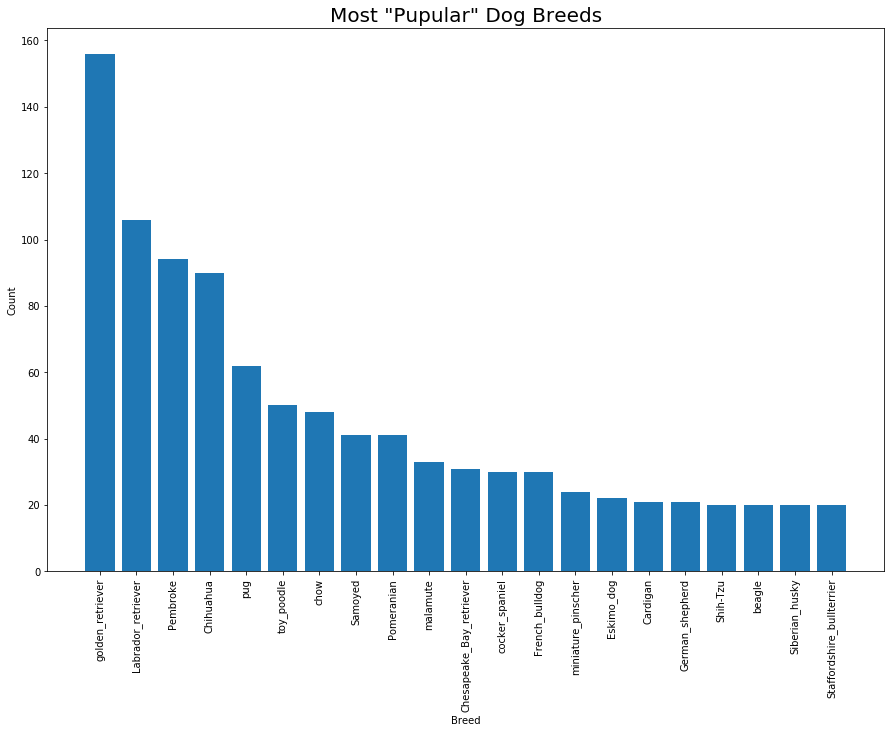

In [81]:
# Most popular dog breeds bar graph

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)
plt.bar(range(len(pop_breeds)), list(pop_breeds.values()), align='center')
plt.xticks(range(len(pop_breeds)), list(pop_breeds.keys()))
plt.xticks(rotation=90)
plt.title('Most "Pupular" Dog Breeds', fontsize=20)
plt.xlabel('Breed')
plt.ylabel('Count')
plt.savefig('pop_breeds.jpg');

The most common dog breed in WeRateDogs Tweets is the Golden Retriever. Laborador Retriever, Corgi, Chihuahua, and Pug make up the rest of the top 5 most "pupular" breeds

In [82]:
# Make list of names with 5 or more occurances

nvc = tam_df.name.value_counts()

pop_names = nvc[nvc >= 5]

pop_names = pop_names.to_dict()

del pop_names['None']

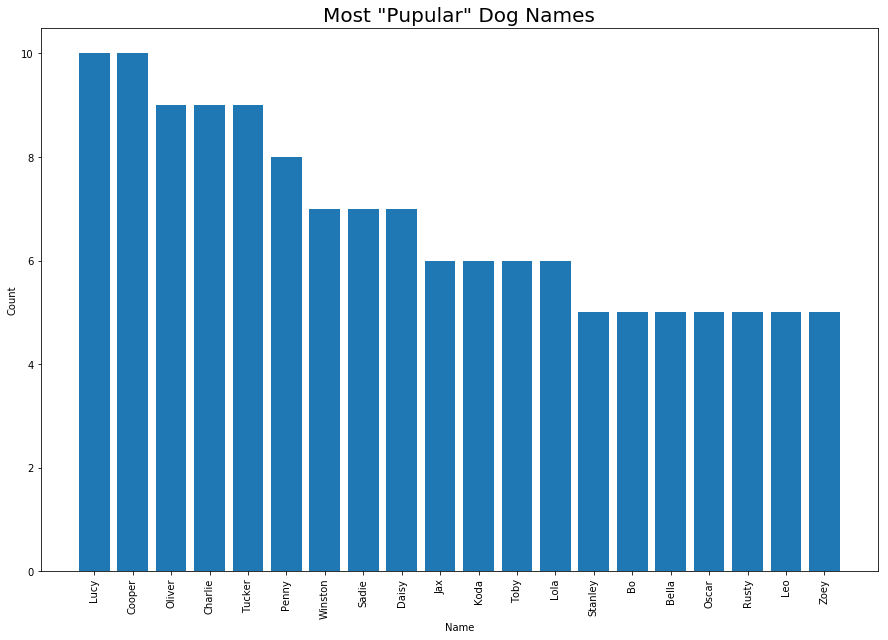

In [83]:
# Most popular dog names bar

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)
plt.bar(range(len(pop_names)), list(pop_names.values()), align='center')
plt.xticks(range(len(pop_names)), list(pop_names.keys()))
plt.xticks(rotation=90)
plt.title('Most "Pupular" Dog Names', fontsize=20)
plt.xlabel('Name')
plt.ylabel('Count')
plt.savefig('pop_names.jpg');

There are several common names featured in the WeRateDogs Tweets. The two most "pupular" are Lucy and Cooper.

In [84]:
# Normalize ratings

tam_df.norm_rating = tam_df.rating_numerator / tam_df.rating_denominator

In [85]:
# Normalized ratings stats

tam_df.norm_rating.describe()

count    1664.000000
mean        1.084139
std         0.186452
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max         3.428571
dtype: float64

In [86]:
# Drop outliers (0 and 3.4)

norm_rate = tam_df.norm_rating.tolist()

norm_rate.remove(max(norm_rate))
norm_rate.remove(min(norm_rate))

In [87]:
print(stat.mean(norm_rate))
print(stat.median(norm_rate))

1.0833802647412756
1.1


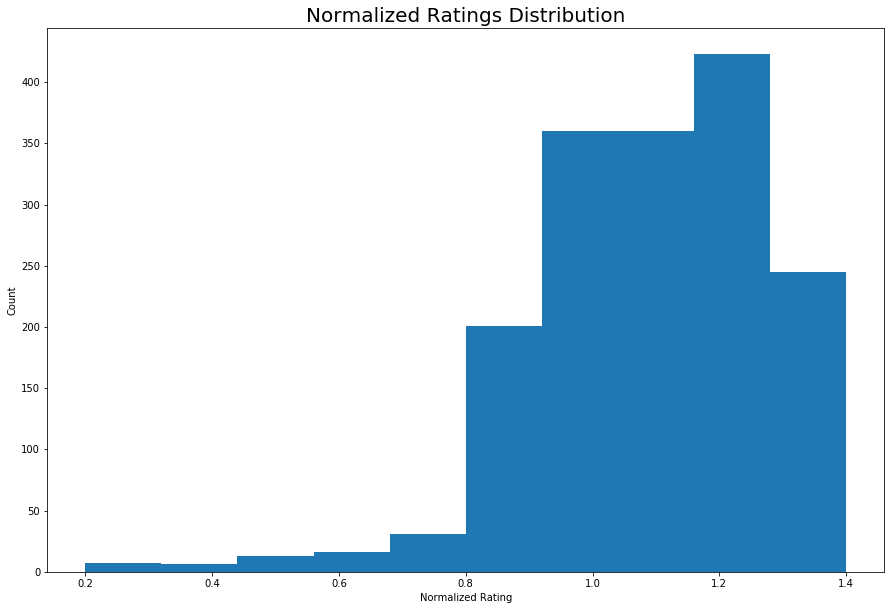

In [88]:
# Normal ratings histogram

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)
plt.hist(norm_rate, bins=10)
plt.title('Normalized Ratings Distribution', fontsize=20)
plt.xlabel('Normalized Rating')
plt.ylabel('Count')
plt.savefig('norm_rate_hist.jpg');

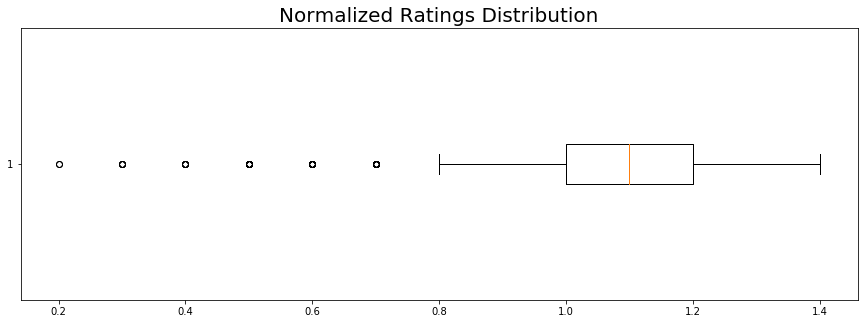

In [89]:
# Normal ratings box plot

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
plt.boxplot(norm_rate, vert=False)
plt.title('Normalized Ratings Distribution', fontsize=20)
plt.savefig('norm_rate_box.jpg');

The rating numerators were divided by the rating denominators in order to normalize for varying denominators and one max and one min outlier were removed for clarity. The mean of the normalized ratings is 1.08 and the median is 1.1. Plotting a histogram of the normalized ratings shows a somewhat left scewed distribution with the majority of ratings falling between 0.8 and 1.4. A boxplot of the data shows that everything below 0.8 is considered an outlier and that the IQR lies between 1.0 and 1.2.

In [90]:
# Extract time and day of the week from timestamp to time and weekday columns

tam_df['time'] = [datetime.datetime.time(d) for d in tam_df['timestamp']]

tam_df['weekday'] = [datetime.datetime.weekday(d) for d in tam_df['timestamp']]

# Make time list, convert times to strings, split strings to get just hours, convert hours to int, subtract 5 hours to convert
# to EST, correct for hours less than 0

time_list = tam_df.time.astype(str)
hour_list = [i.split(':', 1)[0] for i in time_list]
hour_list = [int(i) for i in hour_list]
est_list = [i -5 for i in hour_list]
est_list = [i+24 if i < 0 else i for i in est_list]

In [91]:
# Get number of tweets per day of week and make dict

dvc = tam_df.weekday.value_counts().sort_index()

days = dvc.to_dict()

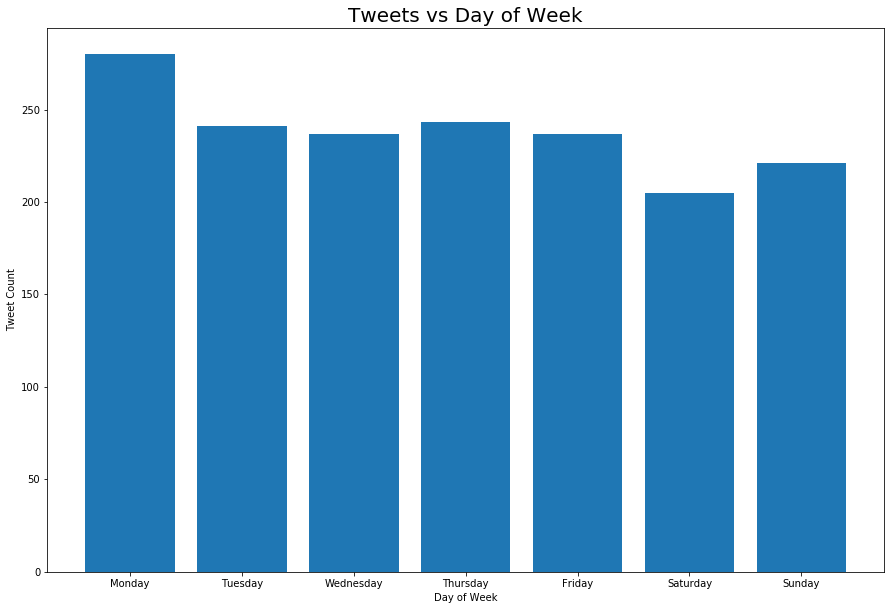

In [92]:
# Bar graph of tweets per day of the week

fig = plt.figure()
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
plt.bar(range(len(days)), list(days.values()), align='center')
plt.xticks(range(len(days)), list(days.keys()))
plt.title('Tweets vs Day of Week', fontsize=20)
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set_xticklabels(labels)
plt.xlabel('Day of Week')
plt.ylabel('Tweet Count')
plt.savefig('tweet_days.jpg');

Tweeting is relativley consistent throughout week without much difference between days of the week. The most tweets are made on Mondays and the least are made on Saturdays, but the distribution is mostly even.

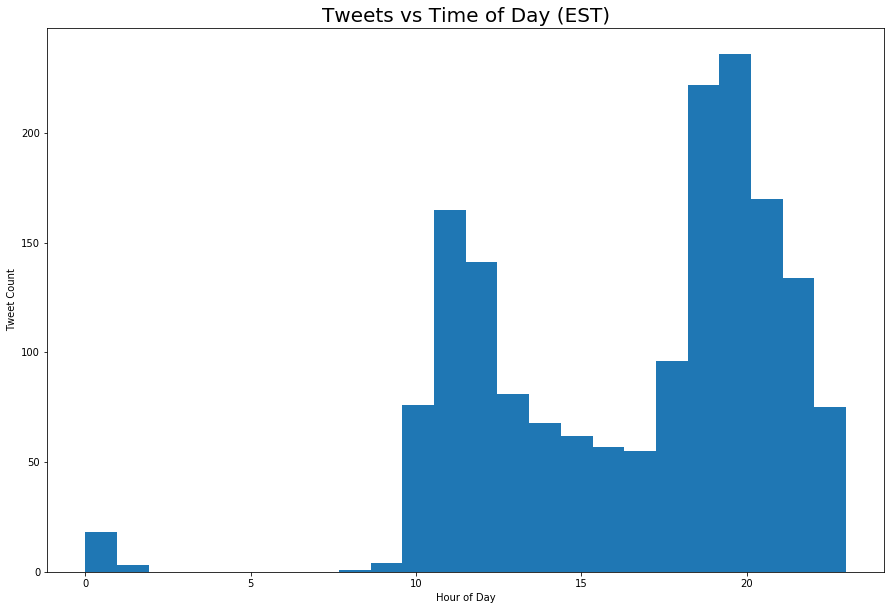

In [93]:
# Histogram of tweets per hour of day in EST

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)
plt.hist(est_list, bins=24)
plt.title('Tweets vs Time of Day (EST)', fontsize=20)
plt.ylabel('Tweet Count')
plt.xlabel('Hour of Day')
plt.savefig('tweet_times.jpg');

The WeRateDogs Twitter account is most active during midday and the evening. Tweeting peaks between 6pm and 8pm EST. There is also a spike in tweeting around noon EST. There is no activity between 2am and 8am EST.

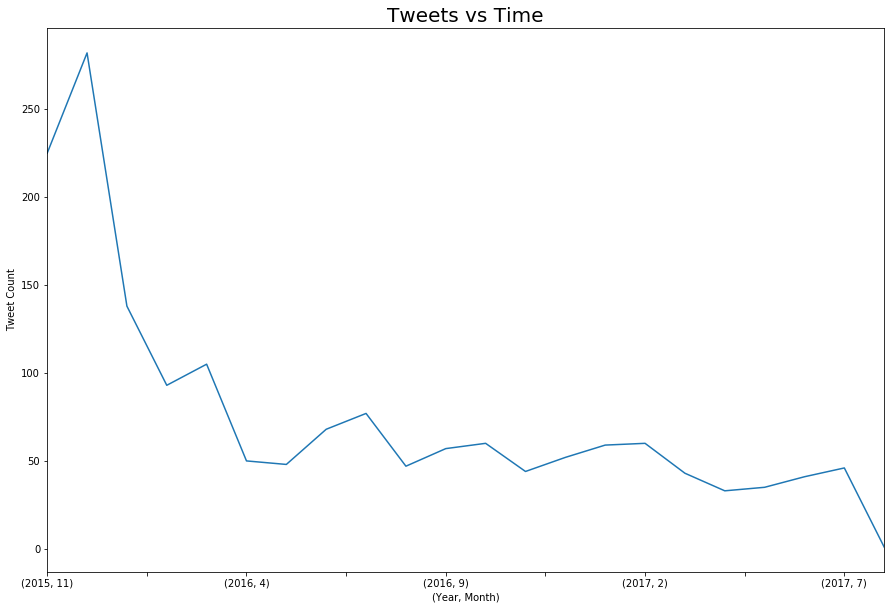

In [94]:
# Plot tweets vs time

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)
tweets = tam_df.tweet_id.groupby([tam_df['timestamp'].dt.year, tam_df['timestamp'].dt.month]).count().plot('line')
plt.title('Tweets vs Time', fontsize=20)
plt.xlabel('(Year, Month)')
plt.ylabel('Tweet Count')
plt.savefig('tweets_vs_time.jpg')

Tweeting activity peaked in 2015 and has declined since then. It seems to have somewhat stabilized at a lower rate from mid 2016 through 2017.

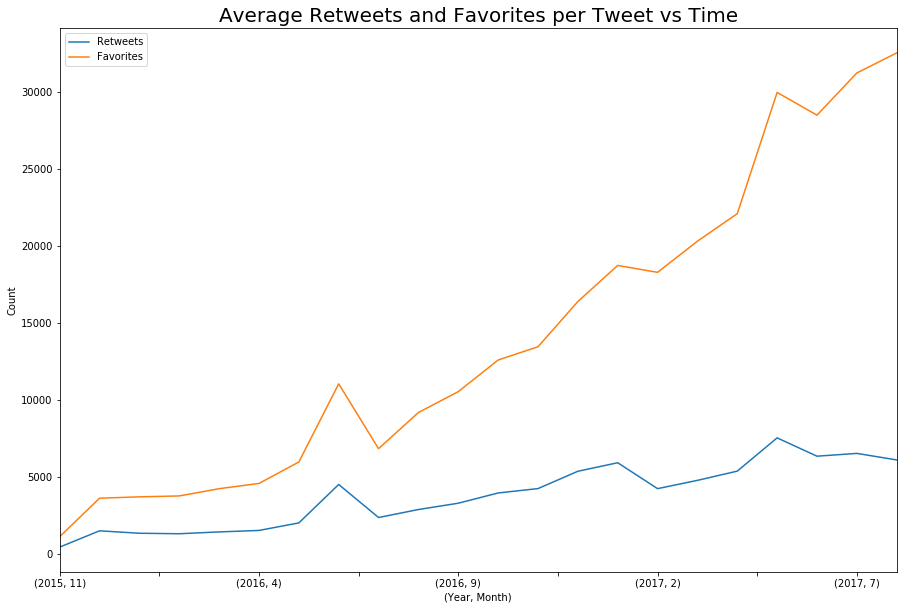

In [95]:
# Plot retweets and favorites vs time

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)
tam_df.retweet_count.groupby([tam_df['timestamp'].dt.year, tam_df['timestamp'].dt.month]).mean().plot('line')
tam_df.favorite_count.groupby([tam_df['timestamp'].dt.year, tam_df['timestamp'].dt.month]).mean().plot('line')
plt.title('Average Retweets and Favorites per Tweet vs Time', fontsize=20)
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites'))
plt.savefig('retweets_favorites.jpg')

The average number of favorites and retweets per tweet has been increasing since 2015. The average retweets per tweet has not increased greatly, but the average favorites per tweet has inceased over tenfold. This trend has occured simultaneously with the decreasing tweet activity over the same time frame. As the number of tweets has gone down, the favorites per tweet has gone up. There is not enough data here to support any causation, but it is likely an effect of increasing popularity. As the WeRateDogs Twitter page has increased in popularity over the past few years, the tweet activity has declined since the page does not need a high volume of tweets to grow or maintain popularity and as popularity increases, the average favorites per tweet has increased.